# Final (Spring 2025)

The final asks you to build a streamlit app that accomplishes two goals: (1) shows the user the proportion of influenza-like illess from 2010 to 2025 and (2) offers a simple characterization of the number of ILI cases over this time period. 

## Step one (Install Python on your local computer)

Streamlit is a python package that cannot be run in Jupyter Labs. 
This means that you must install Python on your local computer.

Instructions for installing python on your local computer can be found in places like 
https://www.python.org/downloads/. 
There exist several hundred tutorials for how to install Python on the internet. 

## Step two (Install Numpy, matplotlib, Scipy, Pandas, and Streamlit)

There are many different packages that we need to run our streamlit application. 
The following packages that we need are: Numpy, matplotlib, Pandas, Scipy, Streamlit.

There exist several hundred tutorials for how to install Python packages on the internet.

## Step three (Create GitHub repository)

On your GitHub account, please create a public repository called "BSTA040-Final".
Clone (Copy) this project from GitHub to your local computer. 
I'll refer to this folder as *BSTA040-Final*

## Step four (Push files)
In *BSTA040-Final* create a file called "project.py"
Enter some text in the file like "XXXX". This text will be replaced and is, for now, only used for testing purposes. 
Git add this file, Git commit, and Git Push to your repository. 

Download from course-site the file called "requirements.txt"
Git add this file, Git commit, and Git Push to your repository. 

You will know if this is correct if the file "project.py" appears in your GitHub repository online.

## Step five (Add ILI data to your project)
Please download the dataset called ilidata.csv from course site and place this file in *BSTA040-Final*
Git add, Git Commit, and Git Push this dataset. 


### Column Descriptions for ILI Dataset

This dataset tracks influenza-like illness (ILI) across U.S. states over time.

---

#### Metadata and Time Identifiers

| Column         | Description |
|----------------|-------------|
| `release_date` | The date the data was made publicly available (YYYY-MM-DD). May be later than when the data was collected. |
| `issue`        | A versioning code for the release (e.g., 201740 = 2017 week 40). |
| `epiweek`      | The epidemiological week of the observation (e.g., 201040 = 2010 week 40). |
| `lag`          | The number of days between the end of the epiweek and the release date (`issue`), indicating reporting delay. |

---

####  Geographic Information

| Column     | Description |
|------------|-------------|
| `state`    | U.S. state abbreviation (e.g., "CA" for California). |
| `location` | Numeric or coded identifier for the state; often used in mapping or grouping. |

---

####  Main Surveillance Metrics

| Column         | Description |
|----------------|-------------|
| `num_ili`      | Raw number of patient visits for influenza-like illness that week. |
| `num_patients` | Total number of patient visits (all causes) reported that week. |
| `num_providers`| Number of healthcare providers submitting data for that week. |
| `wili`         | Weighted ILI percentage: adjusted ILI rate accounting for provider coverage. |
| `ili`          | Unweighted ILI percentage: (ILI cases ÷ total visits) × 100. |

---

####  Age-Specific Data (Sparse Reporting)

| Column       | Description |
|--------------|-------------|
| `num_age_0`  | Number of ILI cases in age group 0–4. |
| `num_age_1`  | Number of ILI cases in age group 5–24. |
| `num_age_2`  | **No data present**. Possibly meant for age group 25–49. |
| `num_age_3`  | Number of ILI cases in age group 25–49. |
| `num_age_4`  | Number of ILI cases in age group 50–64. |
| `num_age_5`  | Number of ILI cases in age group 65+. |

---

####  Flu Season Label

| Column   | Description |
|----------|-------------|
| `season` | Flu season in format "YYYY/YYYY" (e.g., "2010/2011"). Starts in fall of the first year and ends in spring of the second. |

## Step six (Plot ILI data time series depending on the User-selected state)

The goal will be for a user to select a state using a streamlit "selectbox"
[https://docs.streamlit.io/develop/api-reference/widgets/st.selectbox](https://docs.streamlit.io/develop/api-reference/widgets/st.selectbox)

After the user chooses a state, we will plot the percent ILI (`ili`) over time.
For the x-axis, add to your dataframe a column called "weeks" that count the weeks starting from 0 up to the total number of weeks in the dataset. This will be the data for your x-axis. 

You can use st.line_chart to plot this time series.
st.line_chart documentation is here = [https://docs.streamlit.io/develop/api-reference/charts/st.line_chart](https://docs.streamlit.io/develop/api-reference/charts/st.line_chart)

## (Aside) Law of Large Numbers 

The intuition behind the law of large numbers can be characterized by the fol- lowing experiment: you are asked to flip a fair coin and record the whether the coin is heads up or tails up. After 10 flips you are asked to compute the proportion of heads up flips, after 50 flips you are asked to compute this pro- portion, after 100, 1,000, 10,000 flips you are asked to compute the proportion of heads up flips. We expect that if this coin is fair that the proportion of flips with heads face up will get closer and closer to 0.50.

Text(0, 0.5, 'Proportion of Heads (represented as a one)')

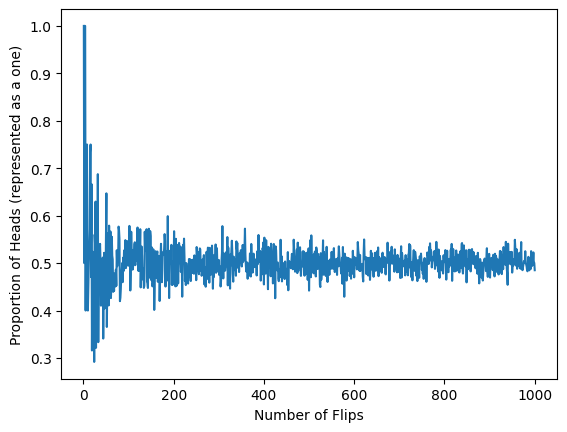

In [16]:
import matplotlib.pyplot as plt 
import numpy as np

flips = np.arange(1,1000+1)

avg_flips = []
for nflip in flips:
    observations = []
    for flip in range(nflip):
        if np.random.random() < 0.50:
            observations.append(1)
        else:
            observations.append(0)
    mean_of_flips = np.mean(observations)
    avg_flips.append( mean_of_flips )

plt.plot(flips, avg_flips)
plt.xlabel("Number of Flips")
plt.ylabel("Proportion of Heads (represented as a one)")

Define a sequence of random variables $X_{1}, X_{2}, \cdots, X_{n}$ such that any pair of random variables, $X_{i}$ and $X_{j}$ are independent (that is $P(X_{i} = x | X_{j} = y) =P(X_{i} = x)$.
Finally, transform this sequence into a single random variable $\overline{X}$ that is equal to $\overline{X} = \dfrac{X_{1} + X_{2} + X_{3} + \cdots X_{N}}{N}$. 

Then the law of large numbers (LLN) states that given any small number $\epsilon$ that is greater than 0 as $n$ grows towards infinity $(n \to \infty)$
\begin{align}
    P( | \overline{X}_{n} - \mu | > \epsilon ) \to 0
\end{align}
where $\mu = \mathbb{E}(\overline{X})$.

We can picture a distribution $Z_{n} = | \overline{X}_{n} - \mu |$ that depends on $n$ and as $n$ increase the random variable $Z_{n}$ assigns more and more probability to the value 0.

Below we show this process and associated random variable $Z_{n}$ for a Bernoulli distributed random variable. 
The random variable $Z_{n} = \sum_{i=1}^{n} X_{n}/n$ where $X_{n} \sim \text{Bernoulli}(1/2)$.
To estimate the probability density function for $Z_{n}$, we simulated 400 draws from $Z_{n}$ by drawing a 1 or 0 from $n$ Bernoulli-distributed random variables, taking the average, and appending this to a list. This process of drawing $n$ Bernoulli random variables, computing the average, and appending is repeated 400 times.


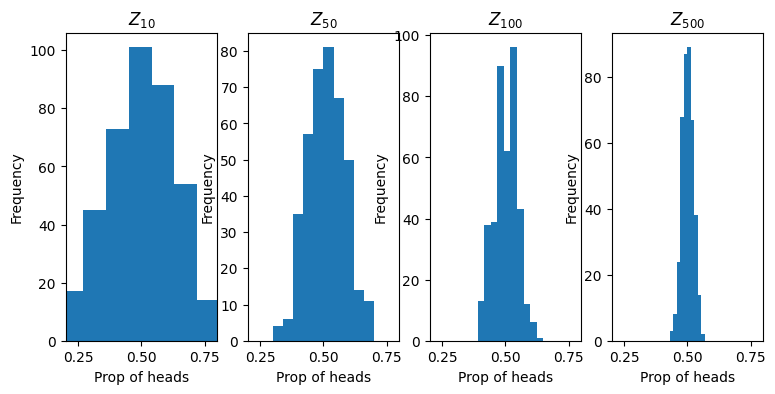

In [17]:
num_mean_observs = 400

avg_flips_10 = []
for _ in range(num_mean_observs):
    observations = []
    for flip in range(10):
        if np.random.random() < 0.50:
            observations.append(1)
        else:
            observations.append(0)
        mean_of_flips = np.mean(observations)
    avg_flips_10.append( mean_of_flips )

avg_flips_50 = []
for _ in range(num_mean_observs):
    observations = []
    for flip in range(50):
        if np.random.random() < 0.50:
            observations.append(1)
        else:
            observations.append(0)
        mean_of_flips = np.mean(observations)
    avg_flips_50.append( mean_of_flips )

avg_flips_100 = []
for _ in range(num_mean_observs):
    observations = []
    for flip in range(100):
        if np.random.random() < 0.50:
            observations.append(1)
        else:
            observations.append(0)
        mean_of_flips = np.mean(observations)
    avg_flips_100.append( mean_of_flips )

avg_flips_500 = []
for _ in range(num_mean_observs):
    observations = []
    for flip in range(500):
        if np.random.random() < 0.50:
            observations.append(1)
        else:
            observations.append(0)
        mean_of_flips = np.mean(observations)
    avg_flips_500.append( mean_of_flips )

fig,axs = plt.subplots(1,4, figsize=(9,4))

axs[0].hist(avg_flips_10)
axs[0].set_xlim(0.2,0.8)
axs[0].set_xlabel("Prop of heads")
axs[0].set_ylabel("Frequency")
axs[0].set_title(r"$Z_{10}$")


axs[1].hist(avg_flips_50)
axs[1].set_xlim(0.2,0.8)
axs[1].set_xlabel("Prop of heads")
axs[1].set_ylabel("Frequency")
axs[1].set_title(r"$Z_{50}$")


axs[2].hist(avg_flips_100)
axs[2].set_xlim(0.2,0.8)
axs[2].set_xlabel("Prop of heads")
axs[2].set_ylabel("Frequency")
axs[2].set_title(r"$Z_{100}$")


axs[3].hist(avg_flips_500)
axs[3].set_xlim(0.2,0.8)
axs[3].set_xlabel("Prop of heads")
axs[3].set_ylabel("Frequency")
axs[3].set_title(r"$Z_{500}$")

plt.show()

We see that as $n$ increases the probability distribution becomes more focused around the value 1/2. 
Then, this means that the sample average is expected to have high probability assigned to the true expected value.

Lets use this to characertize influenza-like illness over time.

## (Step 7 Apply the LLN to exponential distribution, no work needed here)

Let $Y \sim \text{Exponential}(\lambda)$ where 
$f_{Y} = \frac{1}{\lambda} e^{-y/\lambda}$ then the expected value $\mathbb{E}(Y) = \lambda$.

This means, then, that if we assumed our ILI values were all drawn independently from the same distribution that the sample average of those observations would be an estimate of the expected value. 
In other words, if we assume that ILI value one is drawn from a $y_{1} \sim \text{Exponential}(\lambda)$, that ILI value two is drawn from a $y_{2} \sim \text{Exponential}(\lambda)$, and so on, then 

\begin{align}
    \bar{y} = \sum_{i=1}^{n} y_{i}/n \approx \lambda
\end{align}

A reasonable estimate for $\lambda$ then is 

\begin{align}
    \hat{\lambda} = \frac{1}{\bar{y}}
\end{align}

Here the "hat" over $\lambda$ denotes an estimate. 

## Step 8 (Apply the LLN and exponential distribution to the ILI data)

In addition to the time series plot, please plot a histogram of the ILI percent as well as an overlay of the estimated exponential density. 

## Step 9 (Description)

Please label all axes clearly and provide a detailed paragraph-level description for both plots. 
You should use a combination of streamlit headers and streamlit text boxes. 

[https://docs.streamlit.io/develop/api-reference/text](https://docs.streamlit.io/develop/api-reference/text)

## Step 10 (Streamlit)

Create a *FREE* streamlit account using your GitHub username 
[https://streamlit.io/](https://streamlit.io/)

When logged in, click
1. "Create App"
2. Deploy a public app from GitHub
3. Copy and paste the URL that refers to your GitHub repositoy for this project
4. For your App URL, choose something easy to understand.
5. Press Deploy

Please send me the code in project.py as well as a link to your streamlit app. 